<a href="https://colab.research.google.com/github/bhargavpirates/HR_Analytics/blob/master/HR_Analytics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Description

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners

A sizeable department has to be maintained, for the purposes of recruiting new talent

More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

 

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

## Problem Statement

* You are required to model the probability of attrition using a logistic regression.
* The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

## My Underastanding of Problem

* What are the factors  responsible for the attrition of  employess form particular Company
* so,by performing Exploratory Data Analysis(EDA) we can find how each feature is responsible for the Attration of employee from the company
* later by desining ML Models finding probablity of the features for the attrition

## Real World / Business Objectives and Constraints

*  Interpertablity of the model 
*  No Strict Latency requried
*  MOdel should give results in Probablity

## Data

*  DATA provided in 5 Different CSV files
  *  general_data.csv                      ==>      Employee Information
  * employee_survey_data.csv     ==>      Employee - Job survey
  * manager_survey_data.csv      ==>      Manager -Employee Suvey
  * Intime.csv                                  ==>     Employee Intime Details
  * OutTime .csv                             ==>     Employee OutTime Details
  

## Mapping the real-world problem to a Machine Learning Problem

#### Type of Machine Learning Problem ::

* Attration is our lable : it contains two  classes (Yes / No)
* so our problem is Binary classification problem
* And interpertibality , with  probablistic model we need to select as per Bisness constraint defined


#### Performance Metric :: 

*  Logloss  :: i have choosen Logloss as my metric because my  output is in probablistic Type
*   And also creating  Confidence Score and Confusion Matrix. 


# Staring Problem


## Libraries used for this Code

In [0]:
import warnings
warnings.filterwarnings("ignore")
import re
import os
import datetime as dt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from  sklearn.svm import SVC
from sklearn.metrics import log_loss, make_scorer
import math 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve 
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.calibration import CalibratedClassifierCV
from prettytable import PrettyTable

## Data Present in Google DRive MOunting to Google Collab

In [0]:
from google.colab import drive
drive.mount('/content/drive')

#!ls "/content/drive/My Drive/Kaggle_dataset/HR_analytics/PA-I_Case_Study_HR_Analytics"

!cp "/content/drive/My Drive/Kaggle_dataset/HR_analytics/PA-I_Case_Study_HR_Analytics/general_data.csv" "general_data.csv"
!cp "/content/drive/My Drive/Kaggle_dataset/HR_analytics/PA-I_Case_Study_HR_Analytics/employee_survey_data.csv" "employee_survey_data.csv"
!cp "/content/drive/My Drive/Kaggle_dataset/HR_analytics/PA-I_Case_Study_HR_Analytics/manager_survey_data.csv" "manager_survey_data.csv"
!cp "/content/drive/My Drive/Kaggle_dataset/HR_analytics/PA-I_Case_Study_HR_Analytics/in_time.csv" "in_time.csv"
!cp "/content/drive/My Drive/Kaggle_dataset/HR_analytics/PA-I_Case_Study_HR_Analytics/out_time.csv" "out_time.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
generalData_df      =  pd.read_csv("general_data.csv")
employee_survey_df  =  pd.read_csv("employee_survey_data.csv")
manager_survey_df   =  pd.read_csv("manager_survey_data.csv")
intime_df           =  pd.read_csv("in_time.csv")
outtime_df          =  pd.read_csv("out_time.csv")

In [0]:
print(generalData_df.shape ,  employee_survey_df.shape ,  manager_survey_df.shape)
print(employee_survey_df.columns.tolist())
print(manager_survey_df.columns.tolist())

(4410, 24) (4410, 4) (4410, 3)
['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
['EmployeeID', 'JobInvolvement', 'PerformanceRating']


In [0]:
df1=pd.merge(generalData_df,employee_survey_df,on='EmployeeID')
final_df=pd.merge(df1,manager_survey_df,on='EmployeeID')

if(len(final_df.columns.tolist())   == (len(generalData_df.columns.tolist()) + len(employee_survey_df.columns.tolist()) + len(manager_survey_df.columns.tolist())) - 2):
  print("OK")
  

OK


In [0]:
final_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


### Finding Null's

In [0]:
print("finding whether is there is any nulls in the final_df  if yes how many  {}".format(final_df.isnull().sum().sum()))
final_df.dropna(inplace=True)
print("finding whether is there is any nulls in after droping the  final_df  if yes how many  {}".format(final_df.isnull().any().sum()))

finding whether is there is any nulls in the final_df  if yes how many  111
finding whether is there is any nulls in after droping the  final_df  if yes how many  0


### Checking whether duplicates present in final_df

In [0]:
final_df_dupliactedRows=final_df[final_df.duplicated( keep=False)].shape[0]
if(final_df_dupliactedRows==0):
  print("there is No duplicate elements in Final_df")
else:
  print("there is  duplicate elements in Final_df")
  

there is No duplicate elements in Final_df


## EDA

### We will cover how to visually analyze:

1. Numerical variables with histograms,
2. Categorical variables with count plots,
3. Relationships between numerical variables with scatter plots, joint plots, and pair plots, and
4. Relationships between numerical and categorical variables with box-and-whisker plots and complex conditional plots.

### UniVariant  Analysis

#### For all columns ploting countplots

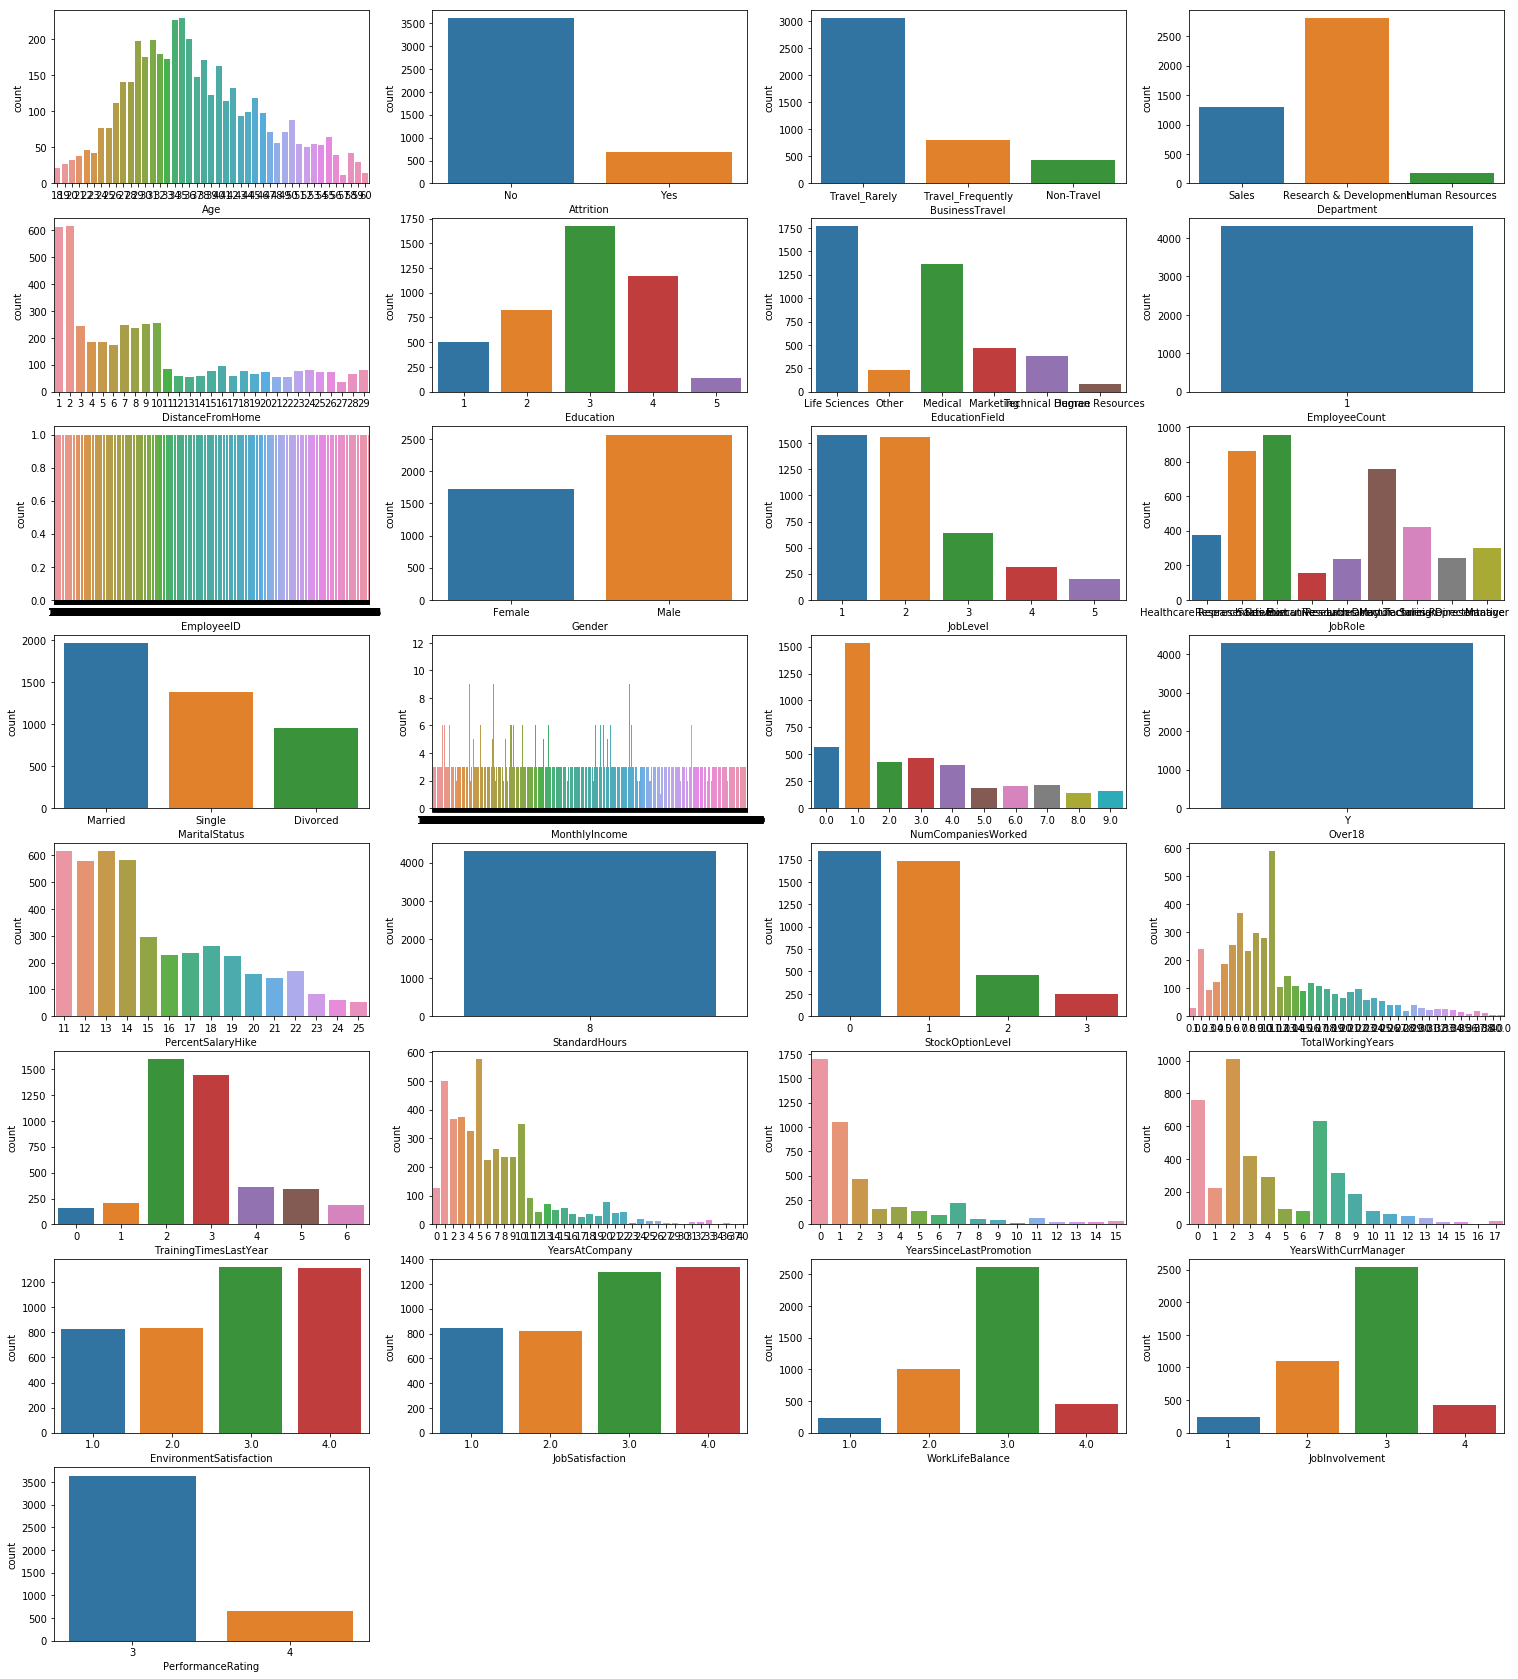

In [0]:
#For all columns doing countplots
fig = plt.figure(figsize=(26,30))
for idx,i in enumerate(final_df.columns.tolist()):
    ax=plt.subplot(8,4,idx+1)
    sns.countplot(x=i,data=final_df,ax=ax)
plt.show()


#### for numerical columns doing univarinat analysis

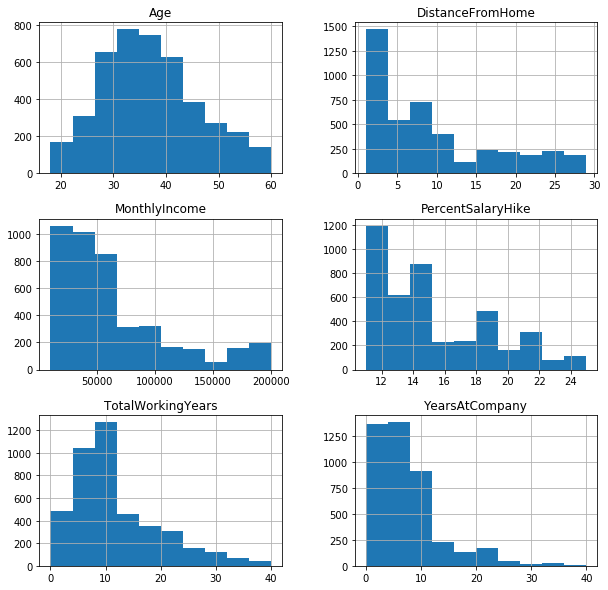

In [0]:
#Divide into NumericalColumns
columns=final_df.columns.tolist()
num_col_eda=['Age','DistanceFromHome','PercentSalaryHike','MonthlyIncome','TotalWorkingYears','YearsAtCompany']
final_df[num_col_eda].hist(figsize=(10,10))
plt.show()

Output :: 
  * Key Observation  from Above Plot are 
      * Except Age most of the Columns are in Skew Distribistion form
      * Age Feature  Distribution is almost Normal Distribution
  * As  logistic regression does not require independent variables to be normal distributed .so i am not changing distribution of features which are skewed into the normal Distribution
      

### Dividing Categorical Columns into Ordinal_columns and Nominal_columns and procedding Univarinat Analysis For them


In [0]:
#Divide into CategoricalColumns
num_attrition=num_col_eda+['Attrition']
Education=['Below-College','College','Bachelor','Master','Doctor']
EnvironmentSatisfaction=['Low','Medium','High','Very High']
JobInvolvement=['Low','Medium','High','Very High']
JobSatisfaction=['Low','Medium','High','Very High']
RelationshipSatisfaction=['Low','Medium','High','Very High']
PerformanceRating=['Low','Good','Excellent','Outstanding']
WorkLifeBalance=['Bad','Good','Better','Best']

val=[Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,WorkLifeBalance]
cat1=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','WorkLifeBalance']

cat_col_eda=set(columns) - set(num_col_eda)
cat_col_eda=set(cat_col_eda) - set(cat1)
fig = plt.figure(figsize=(16,20))

##### for Ordinal Columns doing uni_variant analysis

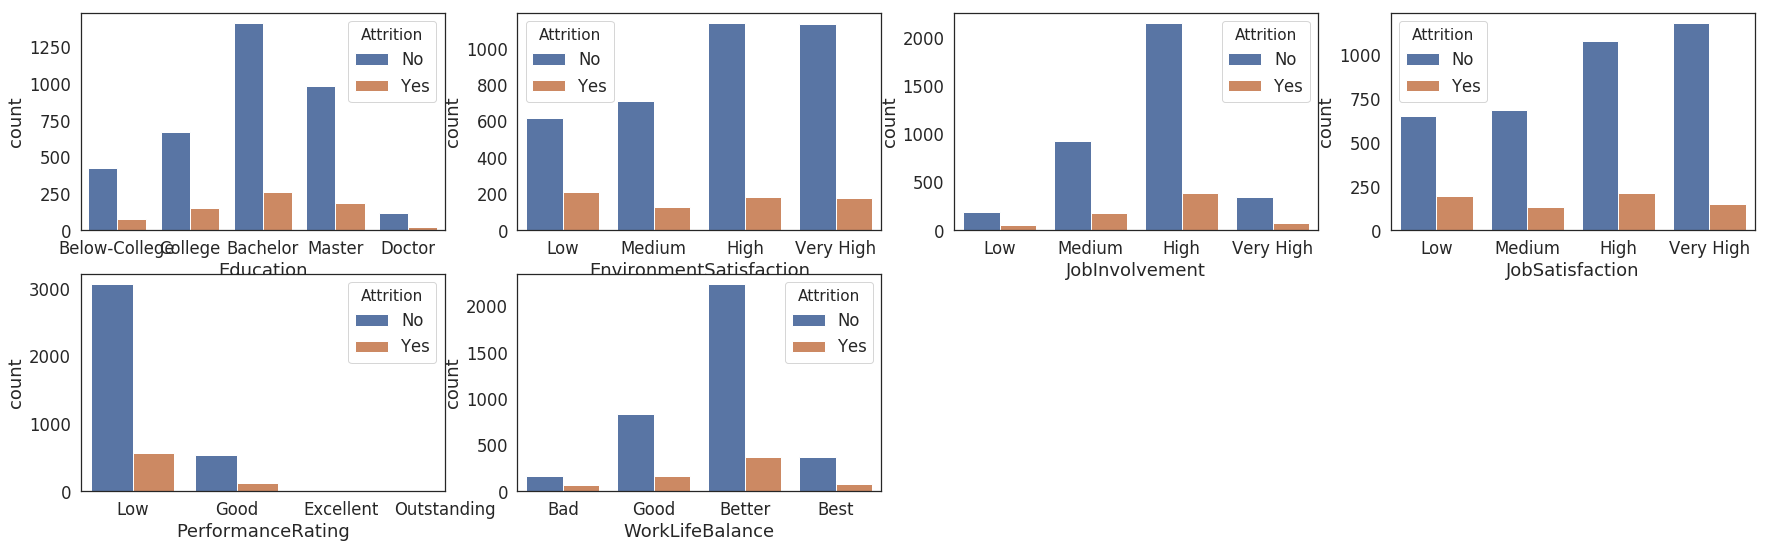

In [0]:
#2. chaning nums as x_ticks to   categorys as x_ticks
fig = plt.figure(figsize=(30,28))
for idx,i in enumerate(zip(cat1,val)):
    #crosstab = pd.crosstab(index=final_df[i[0]], columns=final_df["Attrition"])
    ax=plt.subplot(6,4,idx+1)
    #crosstab.plot(kind="bar",stacked=True,ax=ax)
    #sns.countplot(x=i[0],data=final_df,ax=ax)
    sns.countplot(final_df[i[0]],hue=final_df['Attrition'],ax=ax)
    ax.set(xticks=range(len(i[1])), xticklabels=[j for j in i[1]])
plt.show()

1. there is no paricular distinction 

##### for nominal_column doing univariant analysis 

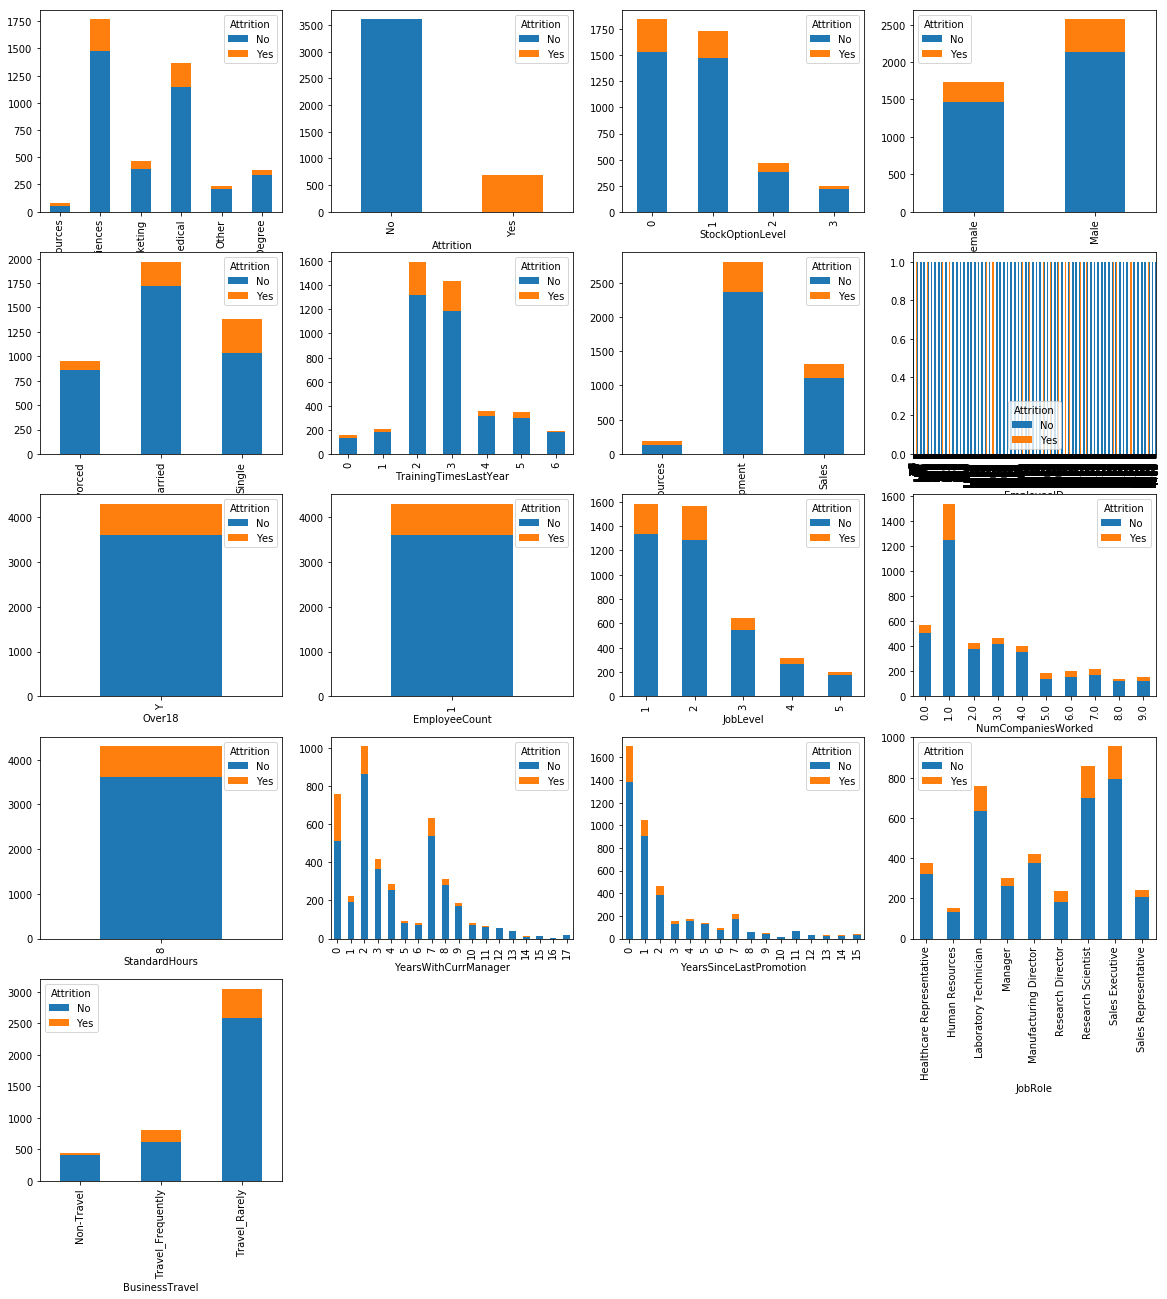

In [0]:
#Divide into CategoricalColumns
#1. with categorys as x_ticks
fig = plt.figure(figsize=(20,26))
for idx,i in enumerate(cat_col_eda):
    crosstab = pd.crosstab(index=final_df[i], columns=final_df["Attrition"])
    ax=plt.subplot(6,4,idx+1)
    crosstab.plot(kind="bar",stacked=True,ax=ax)
    #sns.countplot(x=i[0],data=final_df,ax=ax)
    #ax.set(xticks=range(len(i[1])), xticklabels=[j for j in i[1]])
plt.show()

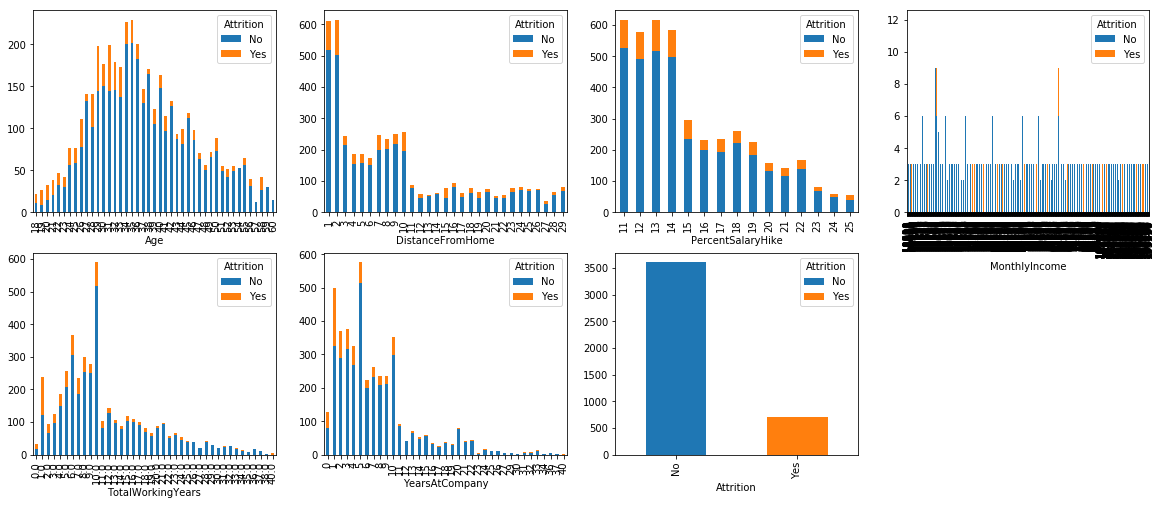

In [0]:
#for i in num_attrition:
#crosstab = pd.crosstab(index=final_df[i], columns=final_df["Attrition"])
#num_attrition=num_col_eda+['Attrition']
fig = plt.figure(figsize=(20,26))
for idx,i in enumerate(num_attrition):
  crosstab = pd.crosstab(index=final_df[i], columns=final_df["Attrition"])
  ax=plt.subplot(6,4,idx+1)
    #sns.boxplot(x=i,data=final_df,ax=ax)
  
  crosstab.plot(kind="bar",stacked=True,ax=ax)

## Finding Outlier in Numerical Data

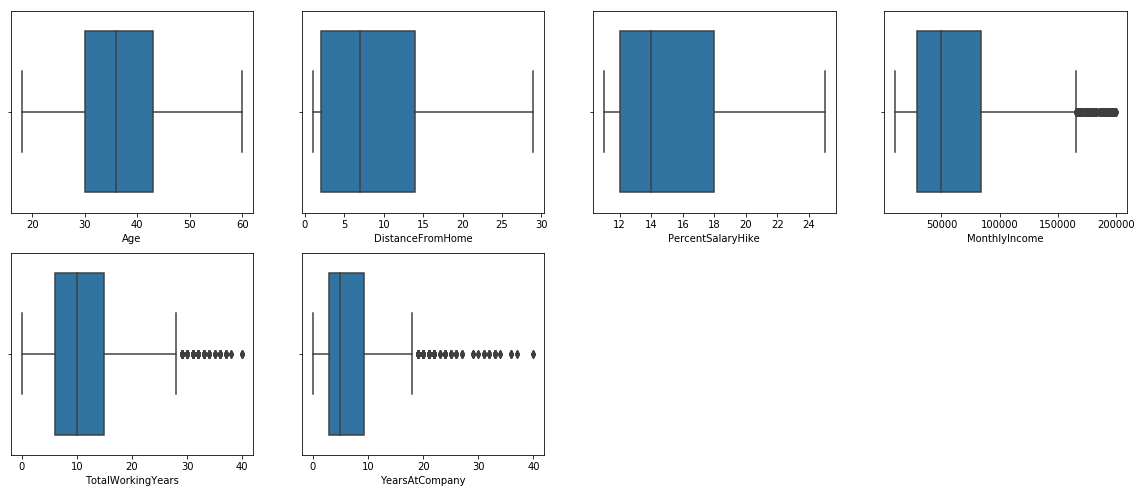

In [0]:
#Box Plot for finding "Outiler" in our data
fig = plt.figure(figsize=(20,26))
for idx,i in enumerate(num_col_eda):
    ax=plt.subplot(6,4,idx+1)
    sns.boxplot(x=i,data=final_df,ax=ax)

* Results from Above Graph:
  1. from above BoxPlot ,Trying to find is there any outliers in Numerical columns
        *  can Observe outliers on MonthlyIncome , TotalWorkingYears and YearsAtCompany Columns
        * from observing on that columns can say those columns some of values not outliers Because there is  highly  possibilites on occuring those numerical values  on those features or columns

* By Observing above plot ,for any considering any two columns we cannot get any conclusioin on Attrition feature

## Feature Extraction

In [0]:
final_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,age_fs,age_fs1
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,50,40-60
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,30,20-40
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,30,20-40
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,30,20-40
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,30,20-40


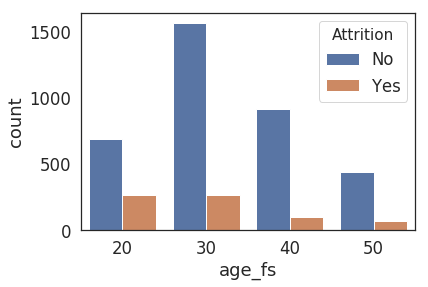

In [0]:
#lambda x: x*10 if x<2 else (x**2 if x<4 else x+10)
#final_df['age_fs']=final_df['Age'].map(lambda x: "20" if(x<30) else ("30" if(30<=x<40) else ("40" if(40<=x<50) else "50")))
final_df['age_fs1']=final_df['Age'].map(lambda x: "20-40" if(x<40) else "40-60")
#sns.FacetGrid(final_df,hue="Attrition",size=3).map(sns.distplot,'age_fs').add_legend()
#plt.show()
#sns.FacetGrid(final_df,hue="Attrition",size=3).map(sns.distplot,'Age').add_legend()

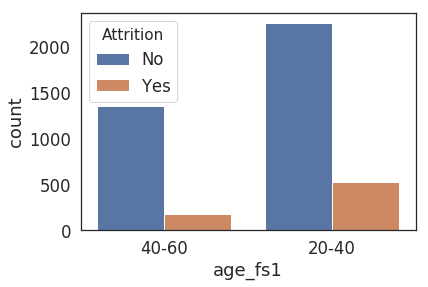

In [0]:
#final_df['age_fs1']=final_df['Age'].map(lambda x: "20-40" if(x<40) else "40-60")
sns.countplot(final_df["age_fs1"],hue=final_df['Attrition'])
plt.show()

## Finding Coorelation

### Corelation on NUmerical Features

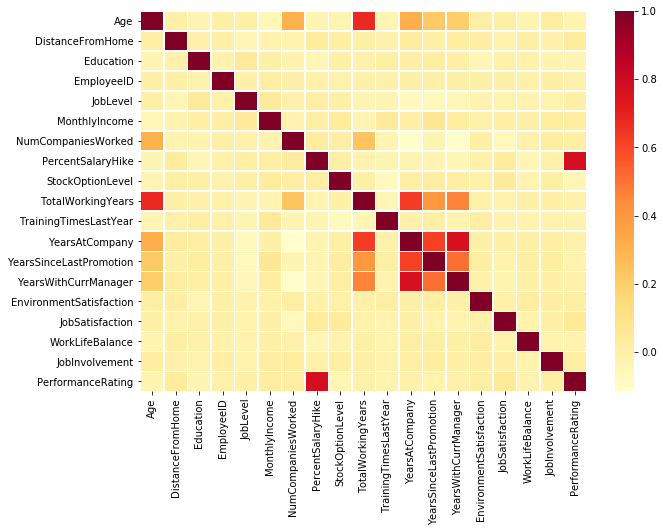

In [0]:
fig, ax = plt.subplots(figsize=(10,7))         # Sample figsize in inches

sns.heatmap(final_df_numerical_data.corr(),cmap='YlOrRd',linewidths=.5,ax=ax)

* There is is no higher dependency between column to columns from above heatMap Plot

## Categorical Varibles Coorelation :: 
### ChiSquare Test for Independence ::
#### Hypothesis Testing Conditions ::

* Our hypotheses will be:

* Null Hypothesis (H0)

    * H0   ::   There is no relationship between 2 categorival varibles ie .. Both features or varibles are independent of each other

* Alternate Hypothesis (H1)

  * H1   ::    There is Relationship between 2 categorical varibles .ie .. Both features or varibles are independent of each other

In [0]:
#categorical=[i for i in final_df.columns.tolist() if(final_df[i].dtype==object)]
#categorical.remove("Over18")

import scipy.stats
from scipy.stats import chi2
results=[]
lst=[]
#final=[]
input_features=[]
chisqr_result=[]
for i in categorical:
  #print("*"*6 + i + "*"*6)
  final=[]
  for j in categorical:
    #print("*"*6 + j + "*"*6)
    #print("*"*6 + i +"--" + j + "*"*6)
    #Contingency Table
    contingency_table=pd.crosstab(final_df[i],final_df[j])
    #print('contingency_table :-\n',contingency_table)
    
    #Observed Values
    Observed_Values = contingency_table.values
    #print("Observed Values :-\n",Observed_Values)
    
    #Expected Values
    #import scipy.stats
    b=scipy.stats.chi2_contingency(contingency_table)
    Expected_Values = b[3]
    #print("Expected Values :-\n",Expected_Values)


    #Degree of Freedom
    no_of_rows=Observed_Values.shape[0]
    no_of_columns=Observed_Values.shape[1]
    df=(no_of_rows-1)*(no_of_columns-1)
    #print("Degree of Freedom:-",df)

    #Significance Level 5%
    alpha=0.05


    #chi-square statistic - χ2
    #from scipy.stats import chi2
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    #print("chi-square statistic:-",chi_square_statistic)


    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=df)
    #print('critical_value:',critical_value)

    #p-value
    p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
    #print('p-value:',p_value)


    #print('Significance level: ',alpha)
    #print('Degree of Freedom: ',df)
    #print('chi-square statistic:',chi_square_statistic)
    #print('critical_value:',critical_value)
    #print('p-value:',p_value)
    
    #lst1=[df,chi_square_statistic,critical_value,p_value]
    lst1=[df,chi_square_statistic,p_value]
    
    #compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
    if(chi_square_statistic>=critical_value):
      #print("Reject H0,There is a relationship between 2 categorical variables")
      test_stat=1
    else:
      #print("Retain H0,There is no relationship between 2 categorical variables")
      test_stat=0
    
    if(p_value<=alpha):
        ##print("Reject H0,There is a relationship between 2 categorical variables")
        p_val=1
    else:
        #print("Retain H0,There is no relationship between 2 categorical variables")
        p_val=0
        
    if((test_stat==1) and (p_val==1) ):
      final_output=1
    else:
      final_output=0
    
    lst.append(lst1)
    final.append(final_output)
    input_features.append((i,j))
    
    
  results.append(lst)
  chisqr_result.append(final)

print(input_features)  
print(results)
print(chisqr_result)
    
    


[('BusinessTravel', 'BusinessTravel'), ('BusinessTravel', 'Department'), ('BusinessTravel', 'EducationField'), ('BusinessTravel', 'Gender'), ('BusinessTravel', 'JobRole'), ('BusinessTravel', 'MaritalStatus'), ('Department', 'BusinessTravel'), ('Department', 'Department'), ('Department', 'EducationField'), ('Department', 'Gender'), ('Department', 'JobRole'), ('Department', 'MaritalStatus'), ('EducationField', 'BusinessTravel'), ('EducationField', 'Department'), ('EducationField', 'EducationField'), ('EducationField', 'Gender'), ('EducationField', 'JobRole'), ('EducationField', 'MaritalStatus'), ('Gender', 'BusinessTravel'), ('Gender', 'Department'), ('Gender', 'EducationField'), ('Gender', 'Gender'), ('Gender', 'JobRole'), ('Gender', 'MaritalStatus'), ('JobRole', 'BusinessTravel'), ('JobRole', 'Department'), ('JobRole', 'EducationField'), ('JobRole', 'Gender'), ('JobRole', 'JobRole'), ('JobRole', 'MaritalStatus'), ('MaritalStatus', 'BusinessTravel'), ('MaritalStatus', 'Department'), ('M

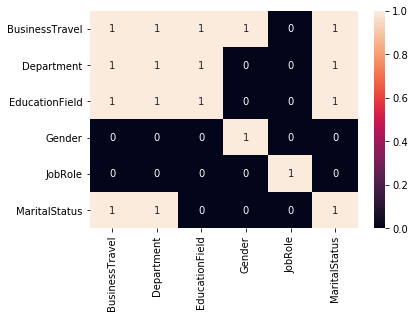

In [0]:
# plot the heatmap
sns.heatmap(chisqr_result, 
        xticklabels=categorical,
        yticklabels=categorical,annot=True)

## Train-Test Split !

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

attrition_lable=final_df['Attrition']
final_df=final_df.drop('Attrition',1)

attrition_lable=attrition_lable.map(lambda x : 1 if(x=='Yes') else 0)


X_train, X_test, y_train, y_test = train_test_split(final_df,attrition_lable,test_size=0.20,stratify=attrition_lable, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train,y_train,test_size=0.20,stratify=y_train, random_state=42)

### Converting Categorical Columns Data into Numrical Data

#### 1. Using Get Dummies

In [0]:
#foe i in [X_train,X_cv,X_test]:
X_train=pd.get_dummies(X_train)
X_cv=pd.get_dummies(X_cv)
X_test=pd.get_dummies(X_test)
  

In [0]:
print(X_train.shape , X_cv.shape , X_test.shape)

(2752, 48) (688, 48) (860, 48)


#### 2. Using COuntVectorizes

In [0]:
#categorical
#[ X_train[i].value_counts().keys().tolist() for i in categorical]

#final_df.applymap(lambda x: j.replace("-","_").replace(" ","_"))
for i in categorical:
  #print(i)
  X_train[i]=X_train[i].map(lambda x: x.replace("-","_").replace(" ","_"))
  X_cv[i]=X_cv[i].map(lambda x: x.replace("-","_").replace(" ","_"))
  X_test[i]=X_test[i].map(lambda x: x.replace("-","_").replace(" ","_"))
  #print(df[i])

#X_train
[ X_test[i].value_counts().keys().tolist() for i in categorical]

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

x_train_MaritalStatus= vect.fit_transform(X_train['MaritalStatus'])
x_test_MaritalStatus = vect.transform(X_test['MaritalStatus'])
x_cv_MaritalStatus  = vect.transform(X_cv['MaritalStatus'])

x_train_MaritalStatus.shape , x_cv_MaritalStatus.shape , x_test_MaritalStatus

vect = CountVectorizer()

x_train_BusinessTravel= vect.fit_transform(X_train['BusinessTravel'])
x_test_BusinessTravel = vect.transform(X_test['BusinessTravel'])
x_cv_BusinessTravel  = vect.transform(X_cv['BusinessTravel'])

x_train_BusinessTravel.shape , x_cv_BusinessTravel.shape , x_test_BusinessTravel.shape
vect.get_feature_names()

x_train_BusinessTravel.toarray()


lst1=[]
for i in categorical:
 	vect = CountVectorizer()

	x_train_vect= vect.fit_transform(final_df[i])

	x_train_col_name=pd.DataFrame(x_train_vect.toarray(),columns=vect.get_feature_names())
  
  lst1.append(x_train_col_name)
  
print(lst1)


horizontalStack = pd.concat([surveySub, surveySubLast10], axis=1)
x_train_col_name=pd.DataFrame(x_train_vect.toarray(),columns=vect.get_feature_names())

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

x_train_BusinessTravel= vect.fit_transform(X_train['MaritalStatus'])
x_test_BusinessTravel = vect.transform(X_test['MaritalStatus'])
x_cv_BusinessTravel  = vect.transform(X_cv['MaritalStatus'])
#col=['JobRole_'+i for i in vect.get_feature_names()]

pd.DataFrame(x_train_BusinessTravel.toarray(),columns=col)


final_df.columns.tolist()

### Checking Distribution On the Label in Test,Train,CV Data

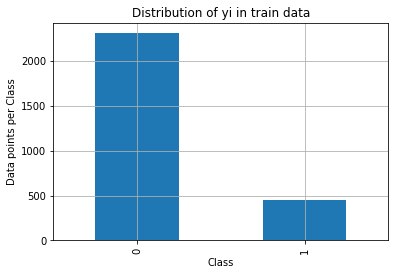

Number of data points in class 0 : 2307 ( 83.83 %)
Number of data points in class 1 : 445 ( 16.17 %)
--------------------------------------------------------------------------------


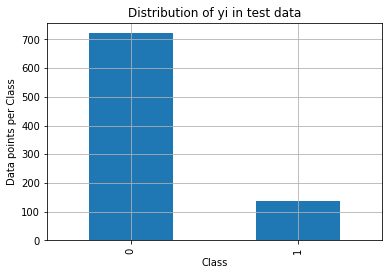

Number of data points in class 1 : 721 ( 83.837 %)
Number of data points in class 2 : 139 ( 16.163 %)
--------------------------------------------------------------------------------


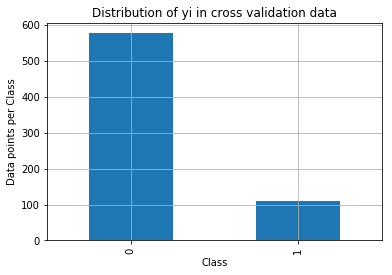

Number of data points in class 1 : 577 ( 83.866 %)
Number of data points in class 2 : 111 ( 16.134 %)


In [0]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts()
test_class_distribution = y_test.value_counts()
cv_class_distribution = y_cv.value_counts()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')

## Functions for ML Models

In [0]:
import math
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from prettytable import PrettyTable


### Function for HyperParameter Tuning

In [0]:
def bestHypermeterFunc(algo,x_train,y_train,x_cv,y_cv,x_test,y_test,verborse,kernel_select=None):
  
  print(kernel_select)
  
  #Defining values for HyperParameter 
  alpha = [10 ** x for x in range(-6, 1)]
  C_log=[math.log(i) for i in alpha]
  #Storing Error in Array
  cv_log_error_array = []
  
  
  for i in alpha:
    
    if(verborse==1):
      print("for alpha =", i)
      
    if(algo=='Logistic_Regression'):
      clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
      
    elif(algo=='SVM'):
        clf = SVC(C=i,kernel=kernel_select , probability=True, class_weight='balanced')
        
    clf.fit(x_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(x_cv)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    if(verborse==1):
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 
      
  if(verborse==1):
    fig, ax = plt.subplots()
    ax.plot(C_log, cv_log_error_array,c='g')
    for i, txt in enumerate(np.round(cv_log_error_array,3)):
      ax.annotate((C_log[i],str(txt)[:4]), (C_log[i],np.round(cv_log_error_array[i],2)))
    plt.grid()
    plt.title("Cross Validation Error for each alpha")
    plt.xlabel("Alpha i's")
    plt.ylabel("Error measure")
    plt.show()
  
  return cv_log_error_array,alpha

### desigining ML Ago For the Best Fit HyperParameter Value

In [0]:
def main_model(algo,x_train,y_train,x_cv,y_cv,x_test,y_test,verborse,kernel_select=None):
  
  #calling bestHypermeterFunc and that Function Return's the CVLog_Error Array,alpha
  cv_log_error_array,alpha = bestHypermeterFunc(algo,x_train,y_train,x_cv,y_cv,x_test,y_test,verborse,kernel_select)
  
  print(kernel_select)
  
  print(cv_log_error_array,alpha)
  print("******bestHypermeterFunc Completed********")
  
  #Finding Best HyperParameter  Index  from cv_log_error_array using np.argmin()
  #from that index find its value
  best_alpha = np.argmin(cv_log_error_array)
  print("for best_alpha =", alpha[best_alpha])
  
  #Actual ML ALgorithm Running
  if(algo=='Logistic_Regression'):
    clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
    
  elif(algo=='SVM'):
    clf = SVC(C=alpha[best_alpha],kernel=kernel_select,probability=True, class_weight='balanced')
    
  clf.fit(x_train, y_train)
  sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
  sig_clf.fit(x_train, y_train)

  #predicting output Labels for all train,CV and Test Data
  predict_train=sig_clf.predict(x_train)
  predict_cv=sig_clf.predict(x_cv)
  predict_test=sig_clf.predict(x_test)
  
  #Finding LogLoss Metrics For all Data using predictProb values
  predictProb_train = sig_clf.predict_proba(x_train)
  logloss_train=log_loss(y_train, predictProb_train, labels=clf.classes_, eps=1e-15)
  print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",logloss_train)
  
  predictProb_cv = sig_clf.predict_proba(x_cv)
  logloss_cv=log_loss(y_cv, predictProb_cv, labels=clf.classes_, eps=1e-15)
  print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",logloss_cv)
  
  predictProb_test = sig_clf.predict_proba(x_test)
  logloss_test=log_loss(y_test, predictProb_test, labels=clf.classes_, eps=1e-15)
  print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",logloss_test)
  
  if(verborse==1):
  #calling ploting function
    plot_confusion_matrix(y_test,predict_test)
    
  return predict_train,predict_cv,predict_test,logloss_train,logloss_cv,logloss_test,clf
  

### Function for ploting Confusion Matrix

In [0]:
#0=N0 , 1=Yes
def plot_confusion_matrix(y_test,pred):
  
  labels = [0,1]
  
  #confusion_matrix
  C = confusion_matrix(y_test,pred)
  
  #Recall MAtrix
  A =(((C.T)/(C.sum(axis=1))).T)
  
  #Precision MAtrix
  B =(C/C.sum(axis=0))
  
  # representing A in heatmap format
  lst=[C,A,B]
  lst_names=["Confusion Matrix","Recall","Precision"]
  
  for i in zip(lst,lst_names):
    print("-"*20, i[1], "-"*20)
    plt.figure(figsize=(7,4))
    sns.heatmap(i[0], annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

### Function for Ploting Pretty Table for Metrics

In [0]:
from prettytable import PrettyTable

def metrics(algo,X_train_scalar,y_train,X_cv_scalar,y_cv,X_test_scalar,y_test,verbrose,kernel_select=None):
  
  predict_train,predict_cv,predict_test,logloss_train,logloss_cv,logloss_test,clf=main_model(algo,X_train_scalar,y_train,X_cv_scalar,y_cv,X_test_scalar,y_test,verbrose,kernel_select)
  
  accuracy_train=accuracy_score(y_train,predict_train)
  accuracy_cv=accuracy_score(y_cv,predict_cv)
  accuracy_test=accuracy_score(y_test,predict_test)
  
  precision_train=precision_score(y_train,predict_train)
  precision_cv=precision_score(y_cv,predict_cv)
  precision_test=precision_score(y_test,predict_test)
  
  recall_train=recall_score(y_train,predict_train)
  recall_cv=recall_score(y_cv,predict_cv)
  recall_test=recall_score(y_test,predict_test)
  
  F1Score_train=f1_score(y_train,predict_train)
  F1Score_cv=f1_score(y_cv,predict_cv)
  F1Score_test=f1_score(y_test,predict_test)
  
  x = PrettyTable()
  x.field_names = ["Metric", "Train_value" , "CV_value","Test_value"]
  
  x.add_row([ "Log-Loss" ,   np.round(logloss_train,3)  ,   np.round(logloss_cv,3)    ,   np.round(logloss_test,3) ])
  x.add_row([ "Precision" ,  np.round(precision_train,3) ,   np.round(precision_cv,3)  ,  np.round(precision_test,3) ])
  x.add_row([ "Recall" ,     np.round(recall_train,3) ,      np.round(recall_cv,3)     ,  np.round(recall_test,3)])
  x.add_row([ "F1-Score" ,   np.round(F1Score_train,3) ,     np.round(F1Score_cv,3)     , np.round(F1Score_test,3)])
  x.add_row([ "Accuracy" ,    np.round(accuracy_train,3)  ,   np.round(accuracy_cv,3)    ,   np.round(accuracy_test,3) ])
  
  print(x)
  
  print("Starting Get Important Features Function")
  get_imp_features(clf,kernel_select)

#### Function to Print Important Features

In [0]:
def get_imp_features(clf,kernel_select):
  
  print(kernel_select)
  if((kernel_select == 'rbf' ) or (kernel_select == 'poly')):
    
    
    print(" Kernel is {} so, we cannot get the important Features using Coef_ Funtion".format(kernel_select))

    
  else:
        
    coefs=sorted(zip(clf.coef_[0],X_train.columns.tolist()))
    feat=X_train.columns.tolist()
               
    top10Negative=coefs[:10]
    top10Postive=coefs[::-1][:10]

    res_neg=pd.DataFrame(top10Negative,columns=['Values','Top10NegativeFeatures'])
    res_pos=pd.DataFrame(top10Postive,columns=['Values','Top10PostiveFeatures'])
    res=pd.concat([res_neg,res_pos],axis=1)
  
    print("*"*20)
    #print(len(feat))
    #print(len(coefs))
  
    feat=[i[1] for i in coefs]
    coefs1=[i[0] for i in coefs]
    plt.figure(figsize=(10,14))
    plt.barh(range(len(feat)), coefs1, align='center')
    plt.yticks(range(len(feat)), feat)
    plt.show()
  
  #return res


### StandaraScalar Function

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scalar=scaler.transform(X_train)
X_cv_scalar=scaler.transform(X_cv)
X_test_scalar=scaler.transform(X_test)

## WIthOut Balanced Data

## Logistic Regression Using Function

None
None
[0.41355938823695143, 0.4100219006093468, 0.3999870173248273, 0.3915234029901148, 0.38726151334759856, 0.3908822257504644, 0.39662538828770216] [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]
******bestHypermeterFunc Completed********
for best_alpha = 0.01
For values of best alpha =  0.01 The train log loss is: 0.3571556733065044
For values of best alpha =  0.01 The cross validation log loss is: 0.38726151334759856
For values of best alpha =  0.01 The test log loss is: 0.3819696610792824
+-----------+-------------+----------+------------+
|   Metric  | Train_value | CV_value | Test_value |
+-----------+-------------+----------+------------+
|  Log-Loss |    0.357    |  0.387   |   0.382    |
| Precision |    0.771    |  0.824   |   0.706    |
|   Recall  |    0.144    |  0.126   |   0.086    |
|  F1-Score |    0.242    |  0.219   |   0.154    |
|  Accuracy |    0.855    |  0.855   |   0.847    |
+-----------+-------------+----------+------------+
********************
48
48


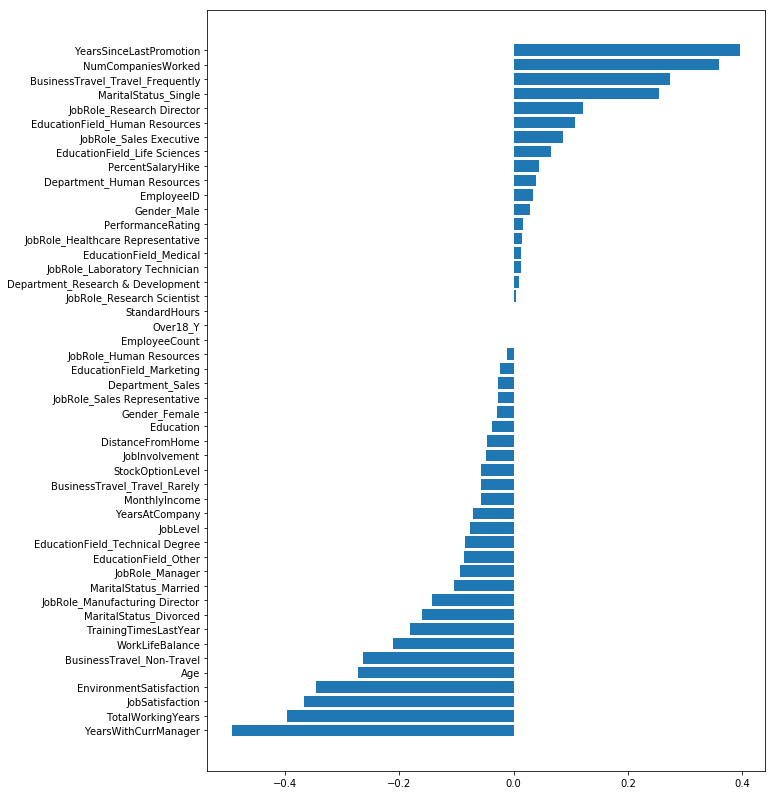

In [0]:
metrics("Logistic_Regression",X_train_scalar,y_train,X_cv_scalar,y_cv,X_test_scalar,y_test,0)

## SVM

### Using Linear Kernal

linear
linear
[0.4001705021624625, 0.40017050214069255, 0.4001705020945628, 0.3930644655688551, 0.392335542092979, 0.392432524331171, 0.3927347253426151] [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]
******bestHypermeterFunc Completed********
for best_alpha = 0.01
For values of best alpha =  0.01 The train log loss is: 0.3605788274237615
For values of best alpha =  0.01 The cross validation log loss is: 0.392335542092979
For values of best alpha =  0.01 The test log loss is: 0.37951616221945994
+-----------+-------------+----------+------------+
|   Metric  | Train_value | CV_value | Test_value |
+-----------+-------------+----------+------------+
|  Log-Loss |    0.361    |  0.392   |    0.38    |
| Precision |    0.652    |   0.75   |    0.5     |
|   Recall  |    0.097    |  0.135   |   0.079    |
|  F1-Score |    0.168    |  0.229   |   0.137    |
|  Accuracy |    0.846    |  0.853   |   0.838    |
+-----------+-------------+----------+------------+
********************


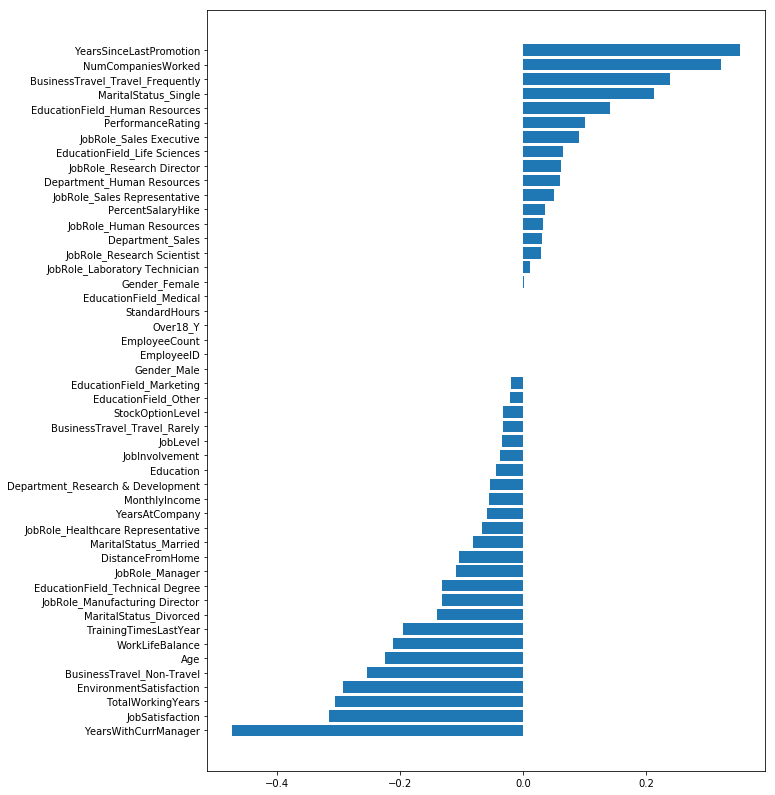

In [0]:
#main_model("SVM",X_train_scalar,y_train,X_cv_scalar,y_cv,X_test_scalar,y_test,0,"linear")
metrics("SVM",X_train_scalar,y_train,X_cv_scalar,y_cv,X_test_scalar,y_test,0,"linear")

### Using RBF Kernal

In [0]:
#bestHypermeterFunc("SVM",X_train_scalar,y_train,X_cv_scalar,y_cv,X_test_scalar,y_test,0,"rbf")
#main_model("SVM",X_train_scalar,y_train,X_cv_scalar,y_cv,X_test_scalar,y_test,0,"rbf")
metrics("SVM",X_train_scalar,y_train,X_cv_scalar,y_cv,X_test_scalar,y_test,0,"rbf")

rbf
rbf
[0.38839479302140256, 0.38839479266666793, 0.388394793777328, 0.38839479323275106, 0.38839479303960245, 0.3679865091027212, 0.25544398583576583] [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]
******bestHypermeterFunc Completed********
for best_alpha = 1
For values of best alpha =  1 The train log loss is: 0.14761040775134368
For values of best alpha =  1 The cross validation log loss is: 0.25544398583576583
For values of best alpha =  1 The test log loss is: 0.2199577636335432
+-----------+-------------+----------+------------+
|   Metric  | Train_value | CV_value | Test_value |
+-----------+-------------+----------+------------+
|  Log-Loss |    0.148    |  0.255   |    0.22    |
| Precision |    0.893    |   0.77   |   0.839    |
|   Recall  |    0.915    |  0.604   |   0.676    |
|  F1-Score |    0.903    |  0.677   |   0.749    |
|  Accuracy |    0.968    |  0.907   |   0.927    |
+-----------+-------------+----------+------------+
Starting Get Important Features Function
rbf


### Using Poly Kernel

In [0]:
#bestHypermeterFunc("SVM",X_train_scalar,y_train,X_cv_scalar,y_cv,X_test_scalar,y_test,0,"poly")
#main_model("SVM",X_train_scalar,y_train,X_cv_scalar,y_cv,X_test_scalar,y_test,0,"poly")
metrics("SVM",X_train_scalar,y_train,X_cv_scalar,y_cv,X_test_scalar,y_test,0,"poly")

poly
poly
[0.4268933254640181, 0.4268933252346095, 0.4268933251404933, 0.42689332468316227, 0.42653262675607684, 0.31752793674744845, 0.21127574204677665] [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]
******bestHypermeterFunc Completed********
for best_alpha = 1
For values of best alpha =  1 The train log loss is: 0.11262149115829316
For values of best alpha =  1 The cross validation log loss is: 0.21127574204677665
For values of best alpha =  1 The test log loss is: 0.19285823825292028
+-----------+-------------+----------+------------+
|   Metric  | Train_value | CV_value | Test_value |
+-----------+-------------+----------+------------+
|  Log-Loss |    0.113    |  0.211   |   0.193    |
| Precision |    0.954    |   0.88   |   0.916    |
|   Recall  |    0.928    |  0.793   |   0.784    |
|  F1-Score |    0.941    |  0.834   |   0.845    |
|  Accuracy |    0.981    |  0.949   |   0.953    |
+-----------+-------------+----------+------------+
Starting Get Important Features Function
p

## With Balanced Data : FOr Balancing Data using SMOTE function from Imblearn Package

In [0]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_balance, y_train_balance = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_balance.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_balance.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_balance==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_balance==0)))

Before OverSampling, counts of label '1': 445
Before OverSampling, counts of label '0': 2307 

After OverSampling, the shape of train_X: (4614, 48)
After OverSampling, the shape of train_y: (4614,) 

After OverSampling, counts of label '1': 2307
After OverSampling, counts of label '0': 2307


In [0]:
scaler = StandardScaler()
scaler.fit(X_train_balance)
X_train_scalar=scaler.transform(X_train_balance)
X_cv_scalar=scaler.transform(X_cv)
X_test_scalar=scaler.transform(X_test)

In [0]:
X_train_scalar.shape

(4614, 48)

### Logistic Regression

None
None
[0.6237285769755854, 0.6146666927567451, 0.5896041032669407, 0.5859322390340136, 0.5825722438150815, 0.5846176931817395, 0.6017441506328953] [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]
******bestHypermeterFunc Completed********
for best_alpha = 0.01
For values of best alpha =  0.01 The train log loss is: 0.5237113321410725
For values of best alpha =  0.01 The cross validation log loss is: 0.5825722438150815
For values of best alpha =  0.01 The test log loss is: 0.5472738641985359
+-----------+-------------+----------+------------+
|   Metric  | Train_value | CV_value | Test_value |
+-----------+-------------+----------+------------+
|  Log-Loss |    0.524    |  0.583   |   0.547    |
| Precision |    0.725    |  0.287   |   0.324    |
|   Recall  |    0.772    |   0.64   |   0.698    |
|  F1-Score |    0.748    |  0.397   |   0.443    |
|  Accuracy |    0.739    |  0.686   |   0.716    |
+-----------+-------------+----------+------------+
Starting Get Important Features Funct

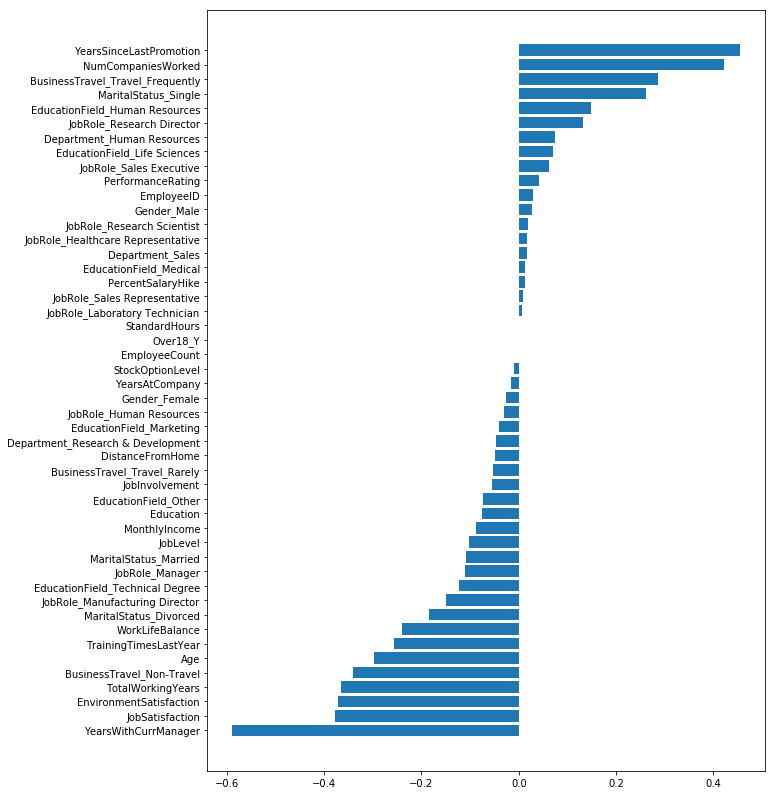

In [0]:
metrics("Logistic_Regression",X_train_scalar,y_train_balance,X_cv_scalar,y_cv,X_test_scalar,y_test,0)

### SVM

#### LInear SVM

linear
for alpha = 1e-06
Log Loss : 0.6143143363763562
for alpha = 1e-05
Log Loss : 0.6143143337374273
for alpha = 0.0001
Log Loss : 0.6142136356700172
for alpha = 0.001
Log Loss : 0.5871537845084024
for alpha = 0.01
Log Loss : 0.5817866567511131
for alpha = 0.1
Log Loss : 0.583009140383031
for alpha = 1
Log Loss : 0.5832164963645


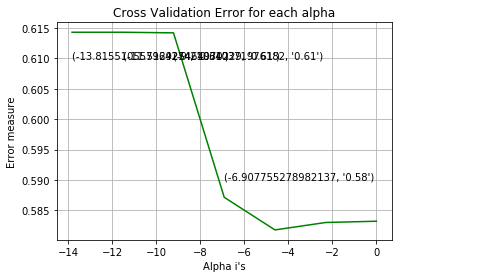

linear
[0.6143143363763562, 0.6143143337374273, 0.6142136356700172, 0.5871537845084024, 0.5817866567511131, 0.583009140383031, 0.5832164963645] [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]
******bestHypermeterFunc Completed********
for best_alpha = 0.01
For values of best alpha =  0.01 The train log loss is: 0.5278361295624395
For values of best alpha =  0.01 The cross validation log loss is: 0.5817866567511131
For values of best alpha =  0.01 The test log loss is: 0.5474462705866496
-------------------- Confusion Matrix --------------------


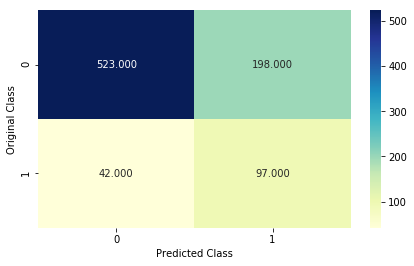

-------------------- Recall --------------------


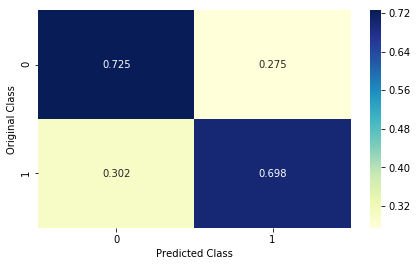

-------------------- Precision --------------------


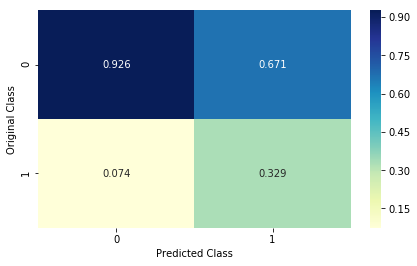

+-----------+-------------+----------+------------+
|   Metric  | Train_value | CV_value | Test_value |
+-----------+-------------+----------+------------+
|  Log-Loss |    0.528    |  0.582   |   0.547    |
| Precision |    0.732    |  0.289   |   0.329    |
|   Recall  |    0.774    |  0.622   |   0.698    |
|  F1-Score |    0.752    |  0.394   |   0.447    |
|  Accuracy |    0.745    |  0.692   |   0.721    |
+-----------+-------------+----------+------------+
Starting Get Important Features Function
linear
********************


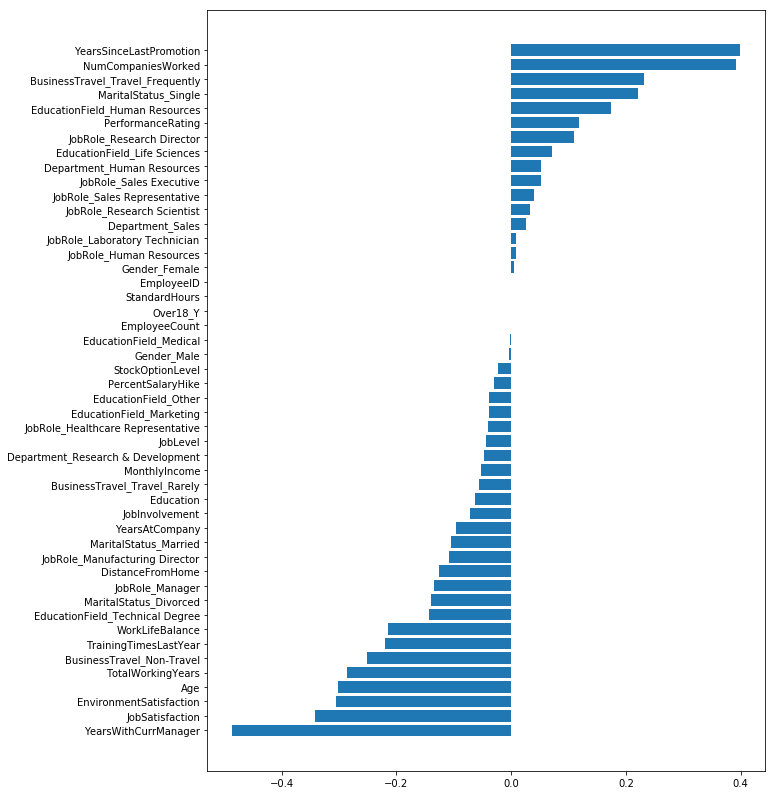

In [0]:
metrics("SVM",X_train_scalar,y_train_balance,X_cv_scalar,y_cv,X_test_scalar,y_test,1,"linear")

#### RBF Kernal

rbf
for alpha = 1e-06
Log Loss : 0.5737661950848786
for alpha = 1e-05
Log Loss : 0.5737661982669221
for alpha = 0.0001
Log Loss : 0.5737661920566736
for alpha = 0.001
Log Loss : 0.5737661955475888
for alpha = 0.01
Log Loss : 0.5735611718000113
for alpha = 0.1
Log Loss : 0.47514516397540624
for alpha = 1
Log Loss : 0.27810729173557835


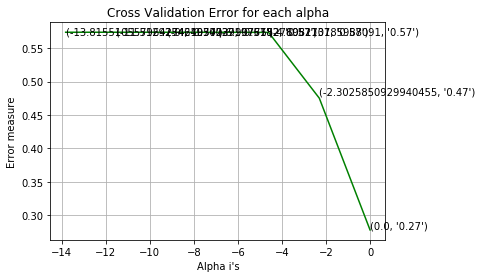

rbf
[0.5737661950848786, 0.5737661982669221, 0.5737661920566736, 0.5737661955475888, 0.5735611718000113, 0.47514516397540624, 0.27810729173557835] [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]
******bestHypermeterFunc Completed********
for best_alpha = 1
For values of best alpha =  1 The train log loss is: 0.06707151930965102
For values of best alpha =  1 The cross validation log loss is: 0.27810729173557835
For values of best alpha =  1 The test log loss is: 0.21711277243059424
-------------------- Confusion Matrix --------------------


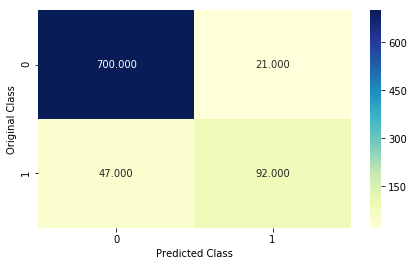

-------------------- Recall --------------------


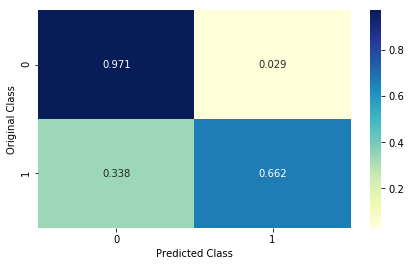

-------------------- Precision --------------------


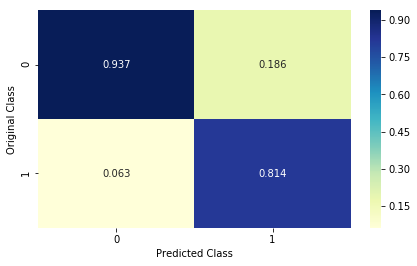

+-----------+-------------+----------+------------+
|   Metric  | Train_value | CV_value | Test_value |
+-----------+-------------+----------+------------+
|  Log-Loss |    0.067    |  0.278   |   0.217    |
| Precision |    0.985    |  0.722   |   0.814    |
|   Recall  |    0.975    |  0.631   |   0.662    |
|  F1-Score |     0.98    |  0.673   |    0.73    |
|  Accuracy |     0.98    |  0.901   |   0.921    |
+-----------+-------------+----------+------------+
Starting Get Important Features Function
rbf
 Kernel is rbf so, we cannot get the important Features using Coef_ Funtion


In [0]:
metrics("SVM",X_train_scalar,y_train_balance,X_cv_scalar,y_cv,X_test_scalar,y_test,1,"rbf")

#### POLy kernal

poly
for alpha = 1e-06
Log Loss : 0.5544280465616621
for alpha = 1e-05
Log Loss : 0.5544279653425883
for alpha = 0.0001
Log Loss : 0.5544279626082605
for alpha = 0.001
Log Loss : 0.554427965596575
for alpha = 0.01
Log Loss : 0.5520345548670238
for alpha = 0.1
Log Loss : 0.4446536394141772
for alpha = 1
Log Loss : 0.23267354410235444


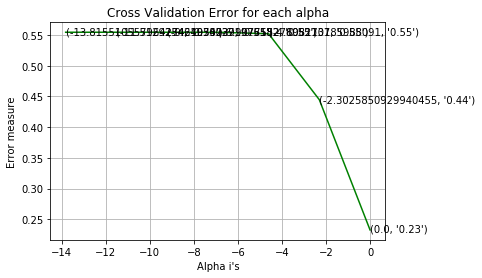

poly
[0.5544280465616621, 0.5544279653425883, 0.5544279626082605, 0.554427965596575, 0.5520345548670238, 0.4446536394141772, 0.23267354410235444] [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]
******bestHypermeterFunc Completed********
for best_alpha = 1
For values of best alpha =  1 The train log loss is: 0.05843126754768401
For values of best alpha =  1 The cross validation log loss is: 0.23267354410235444
For values of best alpha =  1 The test log loss is: 0.19790587725653494
-------------------- Confusion Matrix --------------------


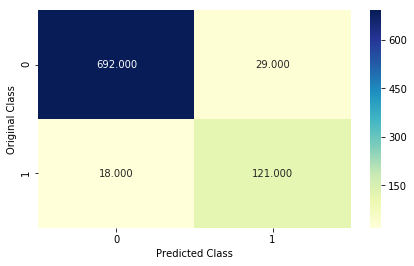

-------------------- Recall --------------------


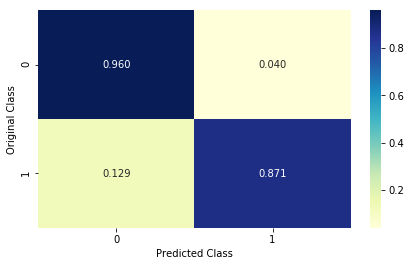

-------------------- Precision --------------------


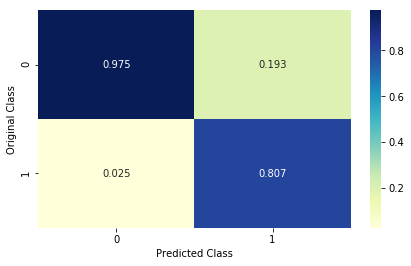

+-----------+-------------+----------+------------+
|   Metric  | Train_value | CV_value | Test_value |
+-----------+-------------+----------+------------+
|  Log-Loss |    0.058    |  0.233   |   0.198    |
| Precision |    0.985    |  0.802   |   0.807    |
|   Recall  |     0.99    |  0.838   |   0.871    |
|  F1-Score |    0.988    |  0.819   |   0.837    |
|  Accuracy |    0.988    |   0.94   |   0.945    |
+-----------+-------------+----------+------------+
Starting Get Important Features Function
poly
 Kernel is poly so, we cannot get the important Features using Coef_ Funtion


In [0]:
metrics("SVM",X_train_scalar,y_train_balance,X_cv_scalar,y_cv,X_test_scalar,y_test,1,"poly")

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
a=pd.DataFrame([ ['NaiveBayes',0.5192,1.163 ,1.195],
                 ['KNN',  0.6288 , 1.006 , 1.083] ,
                 ['LR ClassBlance',   0.4406 , 0.986 , 1.006] ,
                 ['LR NO ClassBlance', 0.4347 , 1.0114  ,1.0298],
                ['SVM LINEAR',  0.4828 ,  1.0236 , 1.056],  
                ['RF with Response coding ', 0.056  , 1.373 , 1.383],
               ['RF with OneHotEncoding', 0.8369 , 1.1908 , 1.1781 ],
                ['SlackModels', 0.5296, 1.124  , 1.19],
                ['max voting', 0.821, 1.167 , 1.196], 
               ['LR NO ClassBlance[Count Vectorize UNIGRAM]', 0.6099, 1.157 , 1.11 ],
                ['LR NO ClassBlance[Count Vectorize BIGRAM]', 0.8382, 1.2165 , 1.2227 ]],
               columns=["MODELS",'Train LogLoss','CV LogLoss','Test LogLoss'],
              )

#plt.figure(figsize=(1,1))
plt.rcParams["figure.figsize"] = [14,9]
a.set_index('MODELS', inplace=True)
a.plot(kind='barh')
plt.xlabel("LogLoss",fontsize=20)
plt.ylabel("MOdels",fontsize=20)
plt.xticks(fontsize=14) #rotation=90)
plt.yticks(fontsize=14)
plt.show()

## Comparsion of Mertrics(LogLoss and  F1Score) with all ML-MOdels along with Data (which is balanced using SMOTE  and Unbalanced Data)

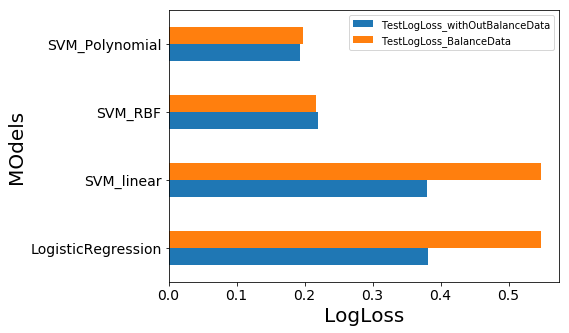

In [0]:
a=pd.DataFrame([ ['LogisticRegression',0.382  ,0.547],
                 ['SVM_linear', 0.38  , 0.547 ] ,
                 ['SVM_RBF',  0.22 ,0.217 ] ,
                 ['SVM_Polynomial', 0.193   ,0.198] ],
               
               columns=["MODELS",'TestLogLoss_withOutBalanceData','TestLogLoss_BalanceData'],
              )
plt.rcParams["figure.figsize"] = [7,5]
a.set_index('MODELS', inplace=True)
a.plot(kind='barh')
plt.xlabel("LogLoss",fontsize=20)
plt.ylabel("MOdels",fontsize=20)
plt.xticks(fontsize=14) #rotation=90)
plt.yticks(fontsize=14)
plt.show()

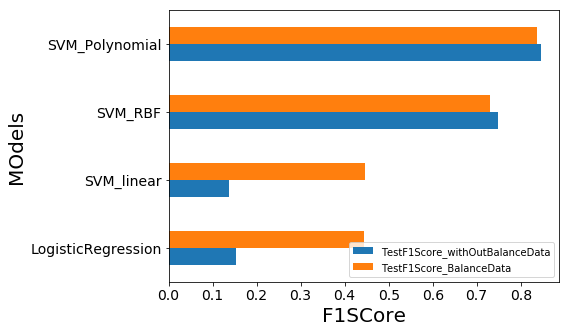

In [0]:
a=pd.DataFrame([ ['LogisticRegression',0.154  ,0.443],
                 ['SVM_linear',  0.137  , 0.447 ] ,
                 ['SVM_RBF', 0.749  ,0.73 ] ,
                 ['SVM_Polynomial', 0.845   ,0.837] ],
               
               columns=["MODELS",'TestF1Score_withOutBalanceData','TestF1Score_BalanceData'],
              )
plt.rcParams["figure.figsize"] = [7,5]
a.set_index('MODELS', inplace=True)
a.plot(kind='barh')
plt.xlabel("F1SCore",fontsize=20)
plt.ylabel("MOdels",fontsize=20)
plt.xticks(fontsize=14) #rotation=90)
plt.yticks(fontsize=14)
plt.show()